In [1]:
import numpy
import matplotlib.pyplot as plt
import torch

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5, 0.5, 0.5))])

trainSet = datasets.MNIST('MNIST_data/', download = True, train = True, transform = transform)

trainLoader = torch.utils.data.DataLoader(trainSet, batch_size = 64, shuffle = True)

In [3]:
#trainLoader batch_size is 64 which means we get 64 images in one iteration.
# Images tensor of size (64, 1, 28, 28)
dataIter = iter(trainLoader)
images, labels = dataIter.next()

print('Images',images.shape)
print('Labels', labels.shape)

Images torch.Size([64, 1, 28, 28])
Labels torch.Size([64])


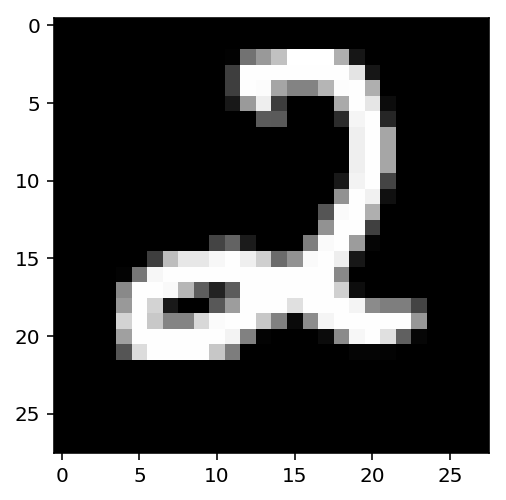

In [4]:
# Look at one of the images
plt.imshow(images[1].numpy().squeeze(), cmap = 'Greys_r')

In [5]:
# We need to convert each batch of images of size 64*28*28 into 64*784 tensor
# This is called flattening of 2D images into 1D vector

In [6]:
#the architecture of our neural network will be 784 inputs
#and say around 256 hidden units and there are 10 output units
#as possible outcomes are from  0 to 9 ''' 

In [7]:
n_input = 28*28
n_hidden = 256
n_output = 10

In [8]:
def activation(x):
    return 1/(1+torch.exp(-x))

# initialize weights
w1 = torch.randn(n_input, n_hidden)
b1 = torch.randn(n_hidden)

w2 = torch.randn(n_hidden, n_output)
b2 = torch.randn(n_output)

In [9]:
inputs = images.view(images.shape[0], -1) # can also use images.view(images.numel())

In [10]:
h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2

In [11]:
print(out)

tensor([[  1.2179,  -6.5837,  -2.4413,  -0.5424,  17.6615, -27.8658,  13.4763,
          -8.7140,  -3.9037,   8.7783],
        [ -1.1662, -12.0211,  -5.7173,  11.0091,   9.4962, -32.3793,  20.0943,
          -9.5718, -10.8663,  11.3659],
        [  4.4553, -19.1379,  -5.5847,  11.2755,  11.9706, -35.9600,  10.9073,
         -14.7027,   2.5096,  11.5156],
        [ -8.6538, -12.9074,  12.7575,  17.8917,   6.7756, -29.6555,  19.9782,
          -6.4583,  -5.7498,   6.8336],
        [ -8.8747,  -7.0710, -11.0779,  14.2408,   6.2115, -21.2958,  12.1991,
         -16.9687,  -4.0054,   4.7940],
        [ -9.0128, -16.2877,  -8.7013,   5.1623,   6.2635, -21.6180,  15.5407,
          -8.3856,   3.0763,  17.3581],
        [  3.5917, -10.6874,  -3.3736,   9.1009,  12.5147, -20.9266,  16.2009,
          -7.8655,  -6.0780,  10.0218],
        [  3.3714, -10.6569,   0.1040,   2.8975,  11.8763, -29.8030,  15.8402,
          -7.3140,   6.2112,  11.3027],
        [ -3.3062, -17.3594,   1.2037,   5.3320,

In [12]:
print(out.shape)

torch.Size([64, 10])


### To get the probability of the image belonging to a particular class, we often use softmax function

In [13]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x), dim = 1).view(-1, 1)

probabilities = softmax(out) 

In [14]:
print(probabilities.shape)

torch.Size([64, 10])


In [16]:
print(probabilities.sum(dim = 1))

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


## Building neural networks using PyTorch's 'nn' module

In [17]:
# Building the above network using nn module

In [18]:
from torch import nn

In [26]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # input to hidden layer transformation
        self.hidden = nn.Linear(28*28, 256) # this does the linear transformation (Wx+b)
        
        #hidden layer to out layer transformation
        self.out = nn.Linear(256, 10)
        
        # define activation functions
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
        def forward(self, x):
            x = self.hidden(x)
            x = self.sigmoid(x)
            x = self.output(x)
            x = self.softmax(x)
            return x

In [27]:
model = Network()
model # See model representation

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax()
)

In [28]:
## We can define the network more concisely and clearly using 'torch.nn.functional' module

In [29]:
import torch.nn.functional as F

In [30]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # input to hidden layer transformation
        self.hidden = nn.Linear(28*28, 256) # this does the linear transformation (Wx+b)
        
        #hidden layer to out layer transformation
        self.out = nn.Linear(256, 10)
    
    def forward(self, x):
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.out(x), dim=1)
        
        return x

In [31]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (out): Linear(in_features=256, out_features=10, bias=True)
)

In [32]:
prob = model.forward(inputs)

/home/surya/anaconda3/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [33]:
prob.shape

torch.Size([64, 10])

### Creating a larger network with 'ReLU' activation

In [40]:
class LargeNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden_1 = nn.Linear(28*28, 128)
        self.hidden_2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, 10)
    
    def forward(self, x):
        x = F.relu(self.hidden_1(x))
        x = F.relu(self.hidden_2(x))
        x = F.softmax(self.out(x), dim=1)
        
        return x

In [41]:
model_1 = LargeNetwork()
model_1

LargeNetwork(
  (hidden_1): Linear(in_features=784, out_features=128, bias=True)
  (hidden_2): Linear(in_features=128, out_features=64, bias=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [42]:
prob_1 = model_1.forward(inputs)

In [43]:
prob_1

tensor([[0.1024, 0.0938, 0.0887, 0.1260, 0.0863, 0.1006, 0.1113, 0.1093, 0.0888,
         0.0925],
        [0.1023, 0.0946, 0.0868, 0.1115, 0.0892, 0.1074, 0.1161, 0.1088, 0.0835,
         0.0997],
        [0.0940, 0.0891, 0.0794, 0.1203, 0.0924, 0.1023, 0.1133, 0.1167, 0.0928,
         0.0997],
        [0.1003, 0.0949, 0.0843, 0.1238, 0.0949, 0.1041, 0.1112, 0.1048, 0.0831,
         0.0985],
        [0.0967, 0.0921, 0.0882, 0.1171, 0.0869, 0.1024, 0.1120, 0.1110, 0.0903,
         0.1034],
        [0.1019, 0.1015, 0.0812, 0.1173, 0.0988, 0.0961, 0.1200, 0.1040, 0.0866,
         0.0926],
        [0.0958, 0.0979, 0.0852, 0.1259, 0.0878, 0.0960, 0.1121, 0.1115, 0.0929,
         0.0950],
        [0.1056, 0.0935, 0.0920, 0.1171, 0.0862, 0.1062, 0.1113, 0.1051, 0.0932,
         0.0898],
        [0.0981, 0.0946, 0.0874, 0.1244, 0.0883, 0.1066, 0.1141, 0.1074, 0.0886,
         0.0905],
        [0.0967, 0.0945, 0.0785, 0.1211, 0.0997, 0.1049, 0.1140, 0.1050, 0.0890,
         0.0967],
        [0

### Running the model for each data iteration gives the predictions for each image